In [11]:
import pandas as pd

In [12]:
df=pd.read_csv('fake_news/train.csv')

In [13]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
# Independent features
X=df.drop("label",axis=1)

In [15]:
# dependent feature
y=df['label']

In [17]:
df.shape

(20800, 5)

In [19]:
df=df.dropna()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
messages=df.copy()

In [22]:
messages.reset_index(inplace=True)

In [24]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [25]:
import re

In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [31]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [30]:
##Creating tne bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()

In [32]:
y=messages['label']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [34]:
cv.get_feature_names()[:20]

['aa',
 'aaa',
 'aap',
 'aaron',
 'ab',
 'abandon',
 'abandonado',
 'abba',
 'abbi',
 'abbott',
 'abc',
 'abd',
 'abdel',
 'abdeslam',
 'abdic',
 'abduct',
 'abdul',
 'abe',
 'abedi',
 'abedin']

In [35]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [36]:
import matplotlib.pyplot as plt

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinomial NB algorithm

In [40]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [41]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.898
Confusion matrix, without normalization


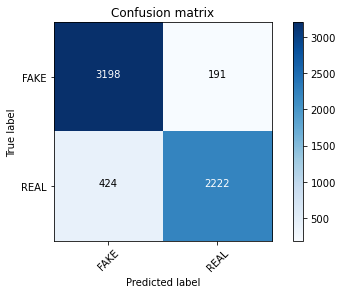

In [42]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [43]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8980944490472246

# Multinomial classifier with hyperparameter

In [44]:
classifier=MultinomialNB(alpha=0.1)

In [45]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8450704225352113
Alpha: 0.1, Score : 0.8966031483015742
Alpha: 0.2, Score : 0.8972659486329743
Alpha: 0.30000000000000004, Score : 0.8989229494614748
Alpha: 0.4, Score : 0.8994200497100249
Alpha: 0.5, Score : 0.8979287489643745
Alpha: 0.6000000000000001, Score : 0.8979287489643745
Alpha: 0.7000000000000001, Score : 0.8985915492957747
Alpha: 0.8, Score : 0.8985915492957747
Alpha: 0.9, Score : 0.8985915492957747


In [47]:
feature_names = cv.get_feature_names()

In [48]:
classifier.coef_[0]

array([-10.97901506, -10.23180065, -10.23180065, ..., -10.97901506,
       -10.97901506, -10.97901506])

In [49]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.184179656745453, 'trump'),
 (-4.471903194584009, 'hillari'),
 (-4.580420121201986, 'clinton'),
 (-5.084000226349203, 'elect'),
 (-5.360629101038223, 'new'),
 (-5.418760866489235, 'comment'),
 (-5.457998681114098, 'video'),
 (-5.570847268258479, 'war'),
 (-5.5808523542194415, 'us'),
 (-5.601167933565853, 'fbi'),
 (-5.664714984682548, 'vote'),
 (-5.750285975995872, 'email'),
 (-5.762269342882969, 'world'),
 (-5.818045880340381, 'obama'),
 (-5.918531955913371, 'donald'),
 (-5.969120776865658, 'russia'),
 (-6.030255165359026, 'day'),
 (-6.046141122947836, 'america'),
 (-6.0869964780459, 'presid'),
 (-6.0869964780459, 'break')]

In [50]:
## MOst fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.979015055737195, 'aa'),
 (-10.979015055737195, 'aaron'),
 (-10.979015055737195, 'abbott'),
 (-10.979015055737195, 'abdel'),
 (-10.979015055737195, 'abdeslam'),
 (-10.979015055737195, 'abdic'),
 (-10.979015055737195, 'abdul'),
 (-10.979015055737195, 'abe'),
 (-10.979015055737195, 'abedi'),
 (-10.979015055737195, 'aber'),
 (-10.979015055737195, 'abhorr'),
 (-10.979015055737195, 'aboard'),
 (-10.979015055737195, 'aborigin'),
 (-10.979015055737195, 'abound'),
 (-10.979015055737195, 'abram'),
 (-10.979015055737195, 'abramson'),
 (-10.979015055737195, 'abridg'),
 (-10.979015055737195, 'abroad'),
 (-10.979015055737195, 'abrupt'),
 (-10.979015055737195, 'absenc'),
 (-10.979015055737195, 'absent'),
 (-10.979015055737195, 'absichtlich'),
 (-10.979015055737195, 'absurdli'),
 (-10.979015055737195, 'acaba'),
 (-10.979015055737195, 'academia'),
 (-10.979015055737195, 'acc'),
 (-10.979015055737195, 'acclaim'),
 (-10.979015055737195, 'accommod'),
 (-10.979015055737195, 'accomplic'),
 (-10.979015